In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import inflect

DF = pd.read_csv("simulated_dns_traffic.csv").pivot(index=["day","hour"], columns="variance", values="domains").reset_index()
DF

variance,day,hour,high,low,medium
0,1,0,25838,17818,34192
1,1,1,9893,22546,26524
2,1,2,27633,23174,20963
3,1,3,13163,24934,17371
4,1,4,42814,26776,20627
...,...,...,...,...,...
163,7,19,13850,20982,26356
164,7,20,43614,22841,18972
165,7,21,90398,22118,24459
166,7,22,36911,17292,19878


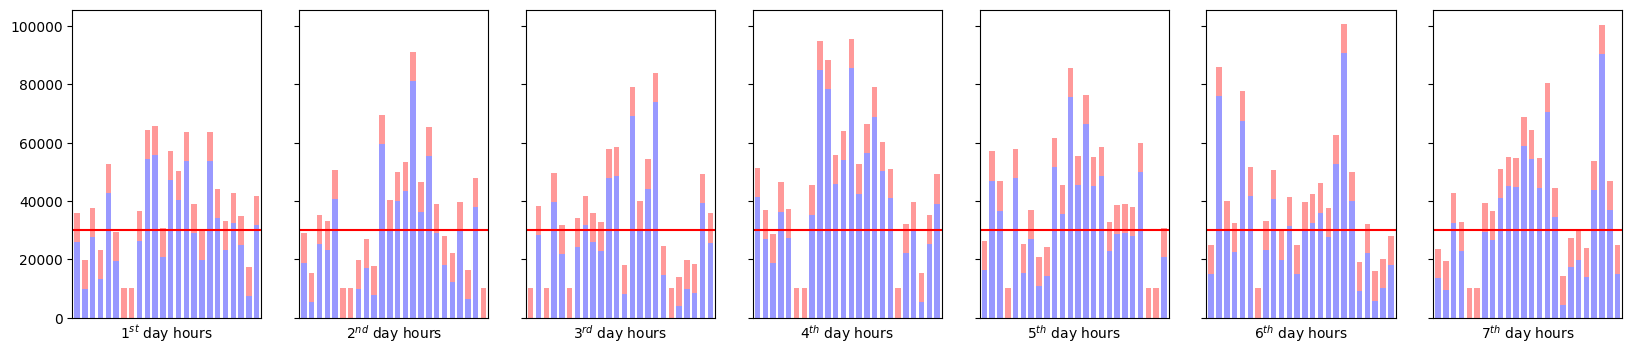

In [2]:


p = inflect.engine()

df = DF

fig, axs = plt.subplots(1, 7, figsize=(20,4), sharey=True)
for day in range(7):
    df = DF[DF.day == (day + 1)]
    
    df.plot.bar("hour", ["high"], width=0.7, color=mcolors.to_rgba("blue", 0.4), ax=axs[day])
    axs[day].bar(df["hour"], 10000, bottom=df["high"].values, width=0.7, color=mcolors.to_rgba("red", 0.4))

    axs[day].set_xticks([])
    axs[day].set_xlabel(f"${day+1}^{{{p.ordinal(day+1)[1:]}}}$ day hours")
    axs[day].axhline(30000, color='red')
    axs[day].get_legend().remove()


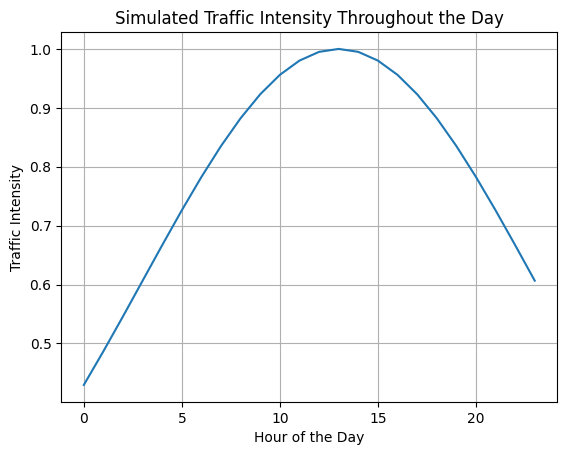

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def traffic_model(hour):
    peak_hour = 13
    std_dev = 10
    
    # Gaussian function centered at peak_hour
    traffic = np.exp(-0.5 * ((hour - peak_hour) / std_dev) ** 2)
    return traffic

# Generate data for 24 hours
hours = np.arange(24)
traffic_values = [traffic_model(hour) for hour in hours]

# Plotting the result for visualization
plt.plot(hours, traffic_values)
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Intensity')
plt.title('Simulated Traffic Intensity Throughout the Day')
plt.grid(True)
plt.show()


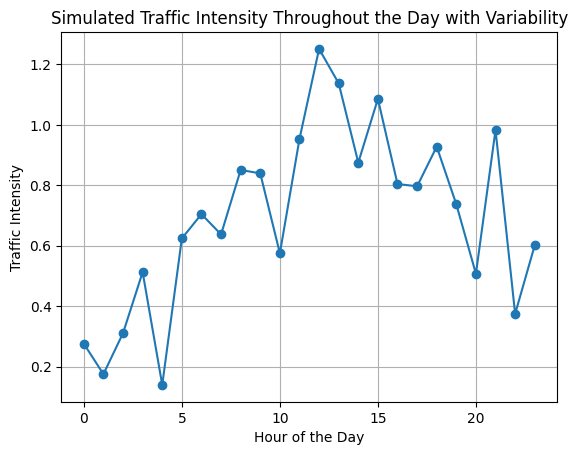

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def traffic_model(hour, variance=0.2):
    peak_hour = 13
    std_dev = 8
    
    # Gaussian function centered at peak_hour
    base_traffic = np.exp(-0.5 * ((hour - peak_hour) / std_dev) ** 2)
    
    # Adding variability
    traffic = base_traffic + np.random.normal(0, variance)
    return max(0, traffic)  # Ensure non-negative values

# Generate data for 24 hours with variance
hours = np.arange(24)
traffic_values = [traffic_model(hour) for hour in hours]

# Plotting the result for visualization
plt.plot(hours, traffic_values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Intensity')
plt.title('Simulated Traffic Intensity Throughout the Day with Variability')
plt.grid(True)
plt.show()


23
[np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_] []
[np.False_, np.True_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_] [(1, 2, 4), (np.float64(197.3786646680871), np.float64(162.22693045424853), np.float64(216.90703668946713))]
[np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_] []
[np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, n

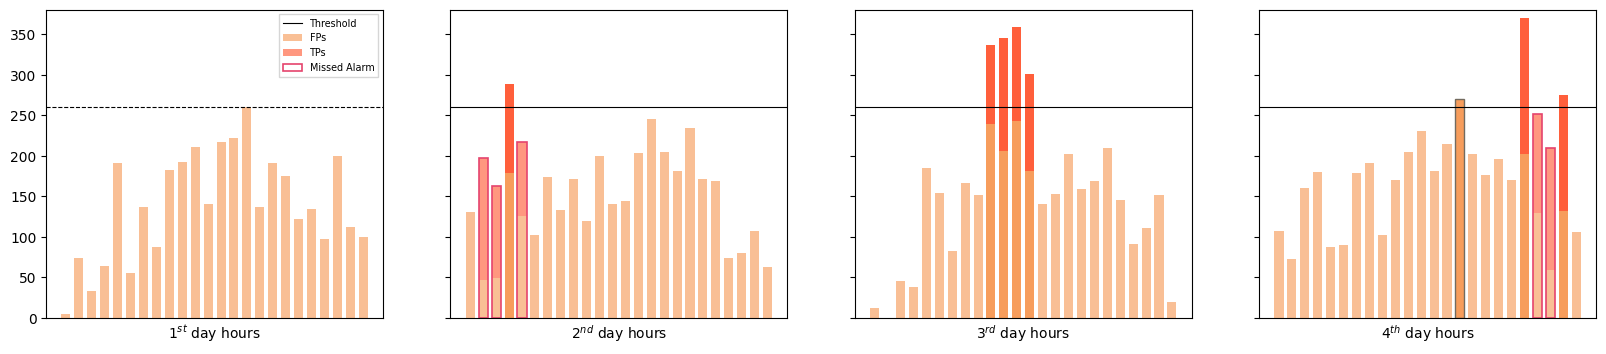

In [83]:
import random

# Genera un numero casuale tra 0 e 24
random_number = random.randint(0, 24)
print(random_number)


def traffic_model(hour, variance=0.2, std_dev=8):
    peak_hour = 13
    
    # Gaussian function centered at peak_hour
    base_traffic = np.exp(-0.5 * ((hour - peak_hour) / std_dev) ** 2)
    
    # Adding variability
    traffic = base_traffic + np.random.normal(0, variance)
    return max(0, traffic)  # Ensure non-negative values


p = inflect.engine()


def bo():
    df = DF
    
    
    FP = 200
    TP = 150
    
    days = 4
    
    hours = np.arange(24)
    fig, axs = plt.subplots(1, days, figsize=(20,4), sharey=True)
    
    FPs_days = [[],[]]
    TPs_days = [
        np.zeros((days, 24)),
        np.zeros((days, 24))
    ]

    ths = np.zeros(7)
    for day in range(days):
        FPs_days[0].append(np.array([FP * traffic_model(hour) for hour in hours]))
    for day in range(days):
        FPs_days[1].append(np.array([FP * traffic_model(hour) for hour in hours]))
        if day > 0:
            TPs_days[1][day] = (np.array([TP * traffic_model(hour, std_dev=24) for hour in hours]))
        
    
    for day in range(days):
        r = [0, 0, 8, 18][day]
        for h in range(24):
            if h <= r or h > r + 4:
                TPs_days[1][day][h] = 0
    M=0
    for day in range(days):
        for h in range(24):
            _M = (TPs_days[1][day] + FPs_days[1][day]).max()
            M = _M if M < _M else M
    
    width = 0.7
    lw=1
    th = FPs_days[1][0].max() # - FPs_days[1][0].std()
    for day in range(days):
        FPs = FPs_days[1][day]
        TPs = TPs_days[1][day]

        true_no_alarms = [ TPs[h] == 0 and FPs[h] <= th  for h in range(24) ]
        true_raised_alarms = [ (TPs[h] > 0 and ((FPs[h] + TPs[h]) > th)) for h in range(24) ]
        wrong_missed_alarms = [ (TPs[h] > 0 and ((FPs[h] + TPs[h]) <= th)) for h in range(24) ]
        wrong_false_alarms = [ (TPs[h] == 0 and (FPs[h] + TPs[h] > th)) for h in range(24) ]

        alarms = [ (FPs[h] + TPs[h]) > th for h in range(24) ]
        
        bar_true_no_alarms = list(zip(*[ (h, FPs[h] + TPs[h]) for h, a in enumerate(true_no_alarms) if a ]))
        bar_true_raised_alarms = list(zip(*[ (h, FPs[h] + TPs[h]) for h, a in enumerate(true_raised_alarms) if a ]))
        bar_wrong_missed_alarms = list(zip(*[ (h, FPs[h] + TPs[h]) for h, a in enumerate(wrong_missed_alarms) if a ]))
        bar_wrong_false_alarms = list(zip(*[ (h, FPs[h] + TPs[h]) for h, a in enumerate(wrong_false_alarms) if a ]))

        print(wrong_missed_alarms, bar_wrong_missed_alarms)

        # ax = axs[row][day]
        ax = axs[day]
        nocolor = (0,0,0,0)
        fpcolor = [(247/255, 157/255, 92/255, 0.65 if not alarms[h] else 1) for h in range(24)]
        tpcolor = [(255/255, 95/255, 59/255, 0.65 if not alarms[h] else 1) for h in range(24)]
        false_color = (115/255,107/255,96/255,1)
        missed_color = [_/255 for _ in (229,68,109)] + [1]
        ax.axhline(th, linewidth=0.8, color='black', label="Threshold", linestyle="--" if day == 0 else "-")


        ax.bar(hours, FPs, bottom=0, width=width, color=fpcolor, label="FPs")
        ax.bar(hours, TPs, bottom=FPs, width=width, linewidth=0, edgecolor=nocolor, color=tpcolor, label="TPs")
        if day > 0:
            # if bar_true_no_alarms:
            #     ax.bar(bar_true_no_alarms[0], bar_true_no_alarms[1], bottom=0, width=width, color=nocolor, linewidth=lw, edgecolor=correctcolor, label="Correct")
            # if bar_true_raised_alarms:
            #     ax.bar(bar_true_raised_alarms[0], bar_true_raised_alarms[1], bottom=0, width=width, color=nocolor, linewidth=lw, edgecolor=nocolor, label="True Alarm")
            if bar_wrong_missed_alarms:
                ax.bar(bar_wrong_missed_alarms[0], bar_wrong_missed_alarms[1], bottom=0, width=width, color=nocolor, linewidth=lw*1.2, edgecolor=missed_color, label="Missed Alarm")
            if bar_wrong_false_alarms:
                ax.bar(bar_wrong_false_alarms[0], bar_wrong_false_alarms[1], bottom=0, width=width, color=nocolor, linewidth=lw, edgecolor=false_color, label="False Alarm")


        ax.set_xticks([])
        ax.set_xlabel(f"${day+1}^{{{p.ordinal(day+1)[1:]}}}$ day hours")
        ax.set_ylim(0,M + 10)
        pass
    
    handles, labels = axs[1].get_legend_handles_labels()

    axs[0].legend(handles, labels, fontsize="x-small", fancybox=False)
    
    fig.savefig("bo.pdf", bbox_inches="tight")
    return fig
_ = bo()


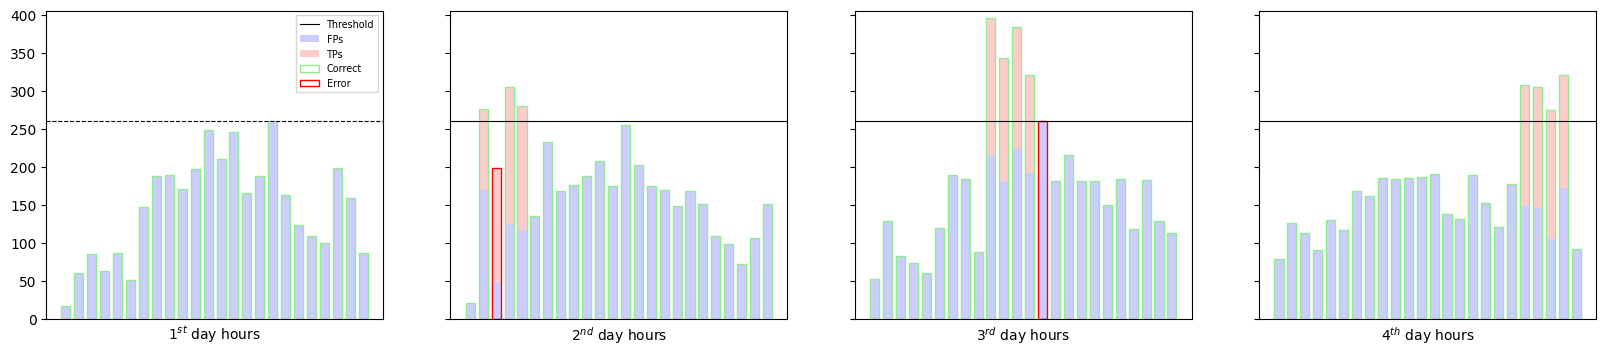